# RVPF - Integrated density contrast

/home/fdavilakurban/anaconda2/envs/fede3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:3411: RuntimeWarning: invalid value encountered in double_scalars
  low = [v if lo else v - e for v, e, lo in zip(data, a, lolims)]


../data/allgxs_nesf100000_redshiftz_invoid_jk_v1e11_minradV9.0.npz
../data/allgxs_nesf100000_redshiftz_invoid_jk_v1e11_minradV9.0_d08.npz
../data/allgxs_nesf100000_redshiftz_invoid_jk_v1e11_minradV9.0_d07.npz


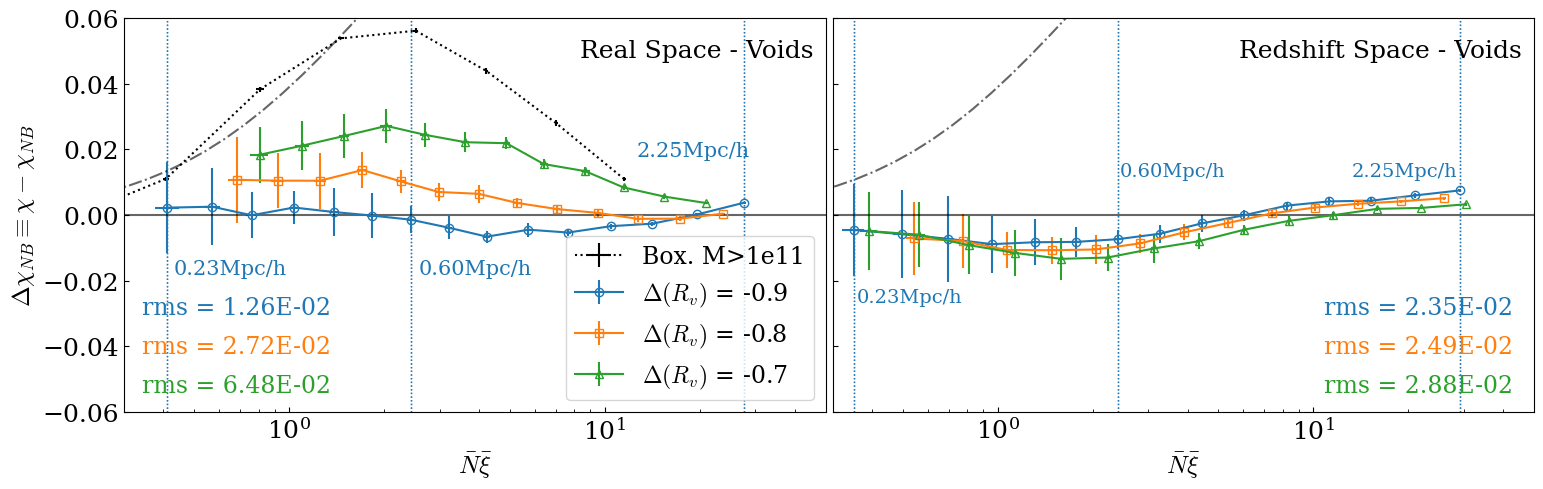

In [170]:
import numpy as np
from cicTools import *
import matplotlib.pyplot as plt

fs = 18

plt.rcParams["xtick.labelsize"] = fs
plt.rcParams["ytick.labelsize"] = fs
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["ytick.direction"] = 'in'
plt.rcParams["xtick.direction"] = 'in'

def chi_NB(x):
    return np.log(1+x)/x
def chi_T(x):
    return (np.sqrt(1+2*x)-1)/x

fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharex=False)
ax=axs[0]
ax1=axs[1]

xmin, xmax = 1E-1, 1E2 
x = np.geomspace(xmin,xmax,50)
#ax.plot(x,np.log(1+x)/x,label='NB',c='k',alpha=0.6)
#ax.plot(x,(np.sqrt(1+2*x)-1)/x,label='Therm.',c='k',ls='-.',alpha=0.6)
ax1.plot(x,chi_NB(x)-chi_NB(x),c='k',alpha=0.6)
ax1.plot(x,chi_T(x)-chi_NB(x),c='k',ls='-.',alpha=0.6)
ax.plot(x,chi_NB(x)-chi_NB(x),c='k',alpha=0.6)
ax.plot(x,chi_T(x)-chi_NB(x),c='k',ls='-.',alpha=0.6)

# a=.2
# ax.plot(x,(1/((1-a)*(x/a)))*((1+x/a)**(1-a)-1),label='GH',c='k',ls='--',alpha=0.6)
# Q=1.2
# ax.plot(x,1-(np.euler_gamma+np.log(4*Q*x))/(8*Q),label='BBGKY',c='k',ls=':',alpha=0.6)

#-------------------------------------------------------------------------------------------
# Plotteo la curva fuera de voids para referenciar

file = '../data/allgxs_nesf100000_jk_minMass1e11.npz'
stats = np.load(file)

chi = stats['arr_0']
chi_std = stats['arr_1']
NXi = stats['arr_2']
NXi_std = stats['arr_3']
P0 = stats['arr_4']
P0_std = stats['arr_5']
N_mean = stats['arr_6']
N_mean_std = stats['arr_7']
xi_mean = stats['arr_8']
xi_mean_std = stats['arr_9']
rs = stats['arr_10']

P0err=delta_P0(P0,10E5)
NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)

# chi vs Nxi
#ax.errorbar(NXi,chi,xerr=NXierr,yerr=chierr,color='k',label='Box. M>1e11',ls=':')
ax.errorbar(NXi,chi-chi_NB(NXi),xerr=NXierr,yerr=chierr,color='k',label='Box. M>1e11',ls=':')

#---------------------------------------------------------------------------------------------

"""
REAL SPACE
"""
files = ['../data/allgxs_nesf100000_invoid_jk_v1e11_minradV9.0.npz',\
         '../data/allgxs_nesf100000_invoid_jk_v1e11_minradV9.0_d08.npz',\
         '../data/allgxs_nesf100000_invoid_jk_v1e11_minradV9.0_d07.npz']
markers = ['o','s','^']
labels = [r'$\Delta(R_v)$ = -0.9', r'$\Delta(R_v)$ = -0.8', r'$\Delta(R_v)$ = -0.7']
ypos_rmss = [.25,.15,.05]

for file,marker,label,ypos_rms in zip(files,markers,labels,ypos_rmss):

    stats = np.load(file)

    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    P0err=delta_P0(P0,10E5)
    NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
    chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)

    # Plot vlines with scales
    if marker=='o':
        space = 1.3
        lw = 1
        ls = ':'
        for ind,xpos_vline,ypos_vline in zip([0,6,-1],[.07,.42,.73],[.35,.35,.65]):
            vline=ax.axvline(NXi[ind],lw=lw,ls=ls)#,color=color)
            ax.axvline(NXi[ind],lw=lw,ls=ls)#,color=color)
            ax.text(xpos_vline,ypos_vline,f'{rs[ind]/1000.:.2f}Mpc/h',\
                    size=fs-3,transform=ax.transAxes,color=vline.get_color())

    # chi vs Nxi
    ebar = ax.errorbar(NXi,chi-chi_NB(NXi),xerr=NXierr,yerr=chierr,marker=marker,mfc='none',label=label)

    # RMS
    mask = np.isfinite(chi) #filter inf and NaN
    rms = np.sqrt(np.sum((chi[mask]-chi_NB(NXi[mask]))**2))
    ax.text(.025,ypos_rms,f'rms = {rms:.2E}',size=fs-1,color=ebar[0].get_color(),transform=ax.transAxes)


"""
REDSHIFT SPACE
"""
files = ['../data/allgxs_nesf100000_redshiftz_invoid_jk_v1e11_minradV9.0.npz',\
         '../data/allgxs_nesf100000_redshiftz_invoid_jk_v1e11_minradV9.0_d08.npz',\
         '../data/allgxs_nesf100000_redshiftz_invoid_jk_v1e11_minradV9.0_d07.npz']
markers = ['o','s','^']
labels = ['Delta = 0.9', 'Delta = 0.8','Delta = 0.7']
ypos_rmss = [.25,.15,.05] 

for file,marker,label,ypos_rms in zip(files,markers,labels,ypos_rmss):
    print(file)
    stats = np.load(file)

    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    # Errors
    P0err=delta_P0(P0,10E5)
    NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
    chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)

    # Plot vlines with scales
    if marker=='o':
        space = 1.3
        lw = 1
        ls = ':'
        for ind,xpos_vline,ypos_vline in zip([0,6,-1],[.035,.41,.74],[.28,.6,.6]):
            vline=ax1.axvline(NXi[ind],lw=lw,ls=ls)#,color=color)
            ax1.axvline(NXi[ind],lw=lw,ls=ls)#,color=color)
            ax1.text(xpos_vline,ypos_vline,f'{rs[ind]/1000.:.2f}Mpc/h',\
                    size=fs-4,transform=ax1.transAxes,color=vline.get_color())

    # chi vs Nxi
    ebar = ax1.errorbar(NXi,chi-chi_NB(NXi),xerr=NXierr,yerr=chierr,marker=marker,mfc='none',label=label)

    # RMS
    mask = np.isfinite(chi) #filter inf and NaN
    rms = np.sqrt(np.sum((chi[mask]-chi_NB(NXi[mask]))**2))
    ax1.text(.7,ypos_rms,f'rms = {rms:.2E}',size=fs-1,color=ebar[0].get_color(),transform=ax1.transAxes)
    

ax1.set_xscale('log')
ax.set_xscale('log')

ax.set_ylabel(r'$\Delta\chi_{NB}\equiv\chi-\chi_{NB}$',fontsize=fs)
#ax1.set_ylabel(r'$\Delta\chi_{NB}$',fontsize=fs)

ax.set_xlabel(r'$\bar{N}\bar{\xi}$',fontsize=fs)
ax1.set_xlabel(r'$\bar{N}\bar{\xi}$',fontsize=fs)
ylim1,ylim2 = -.06,.06
ax1.set_ylim([ylim1,ylim2])
ax.set_ylim([ylim1,ylim2])

ax.legend(loc=4,fontsize=fs-1,ncol=1,frameon=True)#,framealpha=.6)

#ax.set_xticklabels([])
ax1.set_yticklabels([])

ax.tick_params(labelsize=fs)
ax1.tick_params(labelsize=fs)
#ax.text(.025,.9,'Voids',fontsize=15,transform=ax.transAxes)
ax.text(.65,.9,'Real Space - Voids',fontsize=fs,transform=ax.transAxes)
ax1.text(.58,.9,'Redshift Space - Voids',fontsize=fs,transform=ax1.transAxes)

xlim1,xlim2=3E-1,5E1
ax.set_xlim(xlim1,xlim2)
ax1.set_xlim(xlim1,xlim2)

#ax.tick_params(labelsize=fs)
#ax.text(4,1,'Real Space Inside Voids',fontsize=15)

#plt.suptitle('RVPF inside voids',fontsize=fs)
plt.tight_layout()
#plt.subplots_adjust(hspace=0,wspace=0.03)
plt.subplots_adjust(wspace=0.01)

plt.savefig('../plots/rVPF_intDelta.pdf')
plt.show()

# VPF - galaxy mass

../data/allgxs_nesf100000_redshiftz_invoid_jk_v1e11_minradV9.0.npz
../data/allgxs_nesf100000_redshiftz_invoid_jk_minMass1e10_v1e11_minradV9.0.npz
../data/allgxs_nesf100000_redshiftz_invoid_jk_minMass1e11_v1e11_minradV9.0.npz


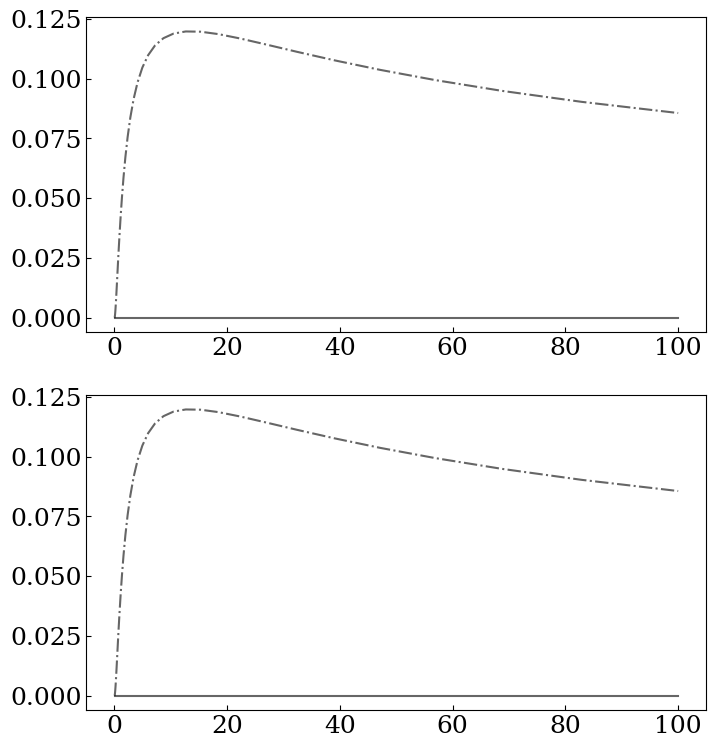

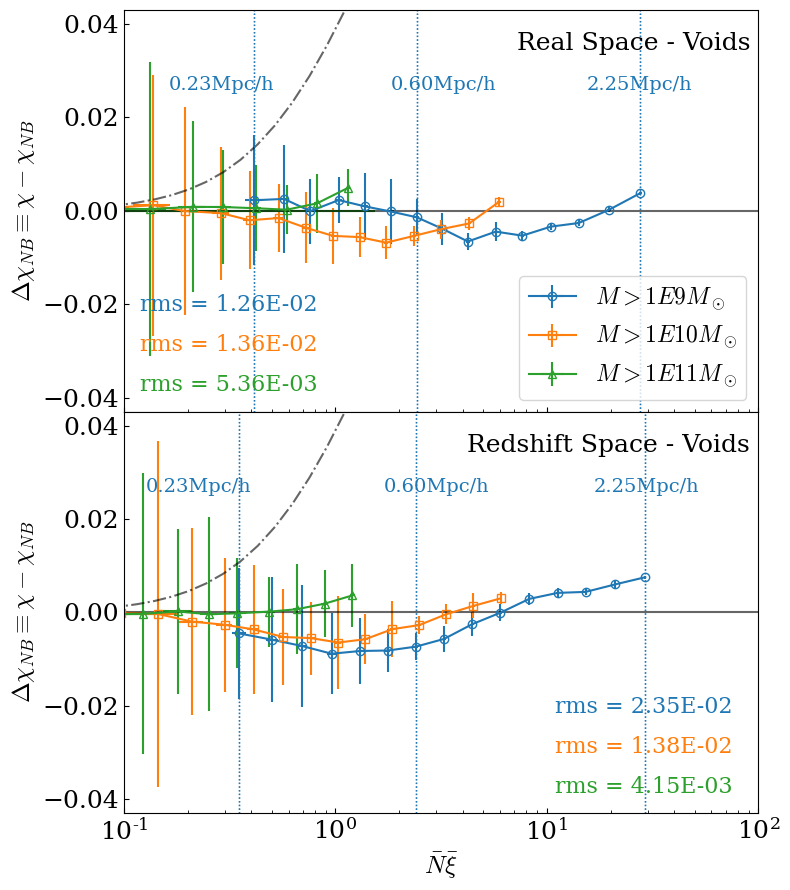

In [7]:
import numpy as np
from cicTools import *
import matplotlib.pyplot as plt

fs = 18

plt.rcParams["xtick.labelsize"] = fs
plt.rcParams["ytick.labelsize"] = fs
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["ytick.direction"] = 'in'
plt.rcParams["xtick.direction"] = 'in'

def chi_NB(x):
    return np.log(1+x)/x
def chi_T(x):
    return (np.sqrt(1+2*x)-1)/x

fig, axs = plt.subplots(2, 1, figsize=(8, 9), sharex=False)
ax=axs[0]
ax1=axs[1]

xmin, xmax = 1E-2, 1E2 
x = np.geomspace(xmin,xmax,50)
#ax.plot(x,np.log(1+x)/x,label='NB',c='k',alpha=0.6)
#ax.plot(x,(np.sqrt(1+2*x)-1)/x,label='Therm.',c='k',ls='-.',alpha=0.6)
ax1.plot(x,chi_NB(x)-chi_NB(x),c='k',alpha=0.6)
ax1.plot(x,chi_T(x)-chi_NB(x),c='k',ls='-.',alpha=0.6)
ax.plot(x,chi_NB(x)-chi_NB(x),c='k',alpha=0.6)
ax.plot(x,chi_T(x)-chi_NB(x),c='k',ls='-.',alpha=0.6)

# a=.2
# ax.plot(x,(1/((1-a)*(x/a)))*((1+x/a)**(1-a)-1),label='GH',c='k',ls='--',alpha=0.6)
# Q=1.2
# ax.plot(x,1-(np.euler_gamma+np.log(4*Q*x))/(8*Q),label='BBGKY',c='k',ls=':',alpha=0.6)


#---------------------------------------------------------------------------------------------

"""
REAL SPACE
"""
files = ['../data/allgxs_nesf100000_invoid_jk_v1e11_minradV9.0.npz',\
         '../data/allgxs_nesf100000_invoid_jk_minMass1e10_v1e11_minradV9.0.npz',\
         '../data/allgxs_nesf100000_invoid_jk_minMass1e11_v1e11_minradV9.0.npz']#,\
         #'../data/allgxs_nesf100000_invoid_jk_minMass1e12_v1e11_minradV9.0.npz']
markers = ['o','s','^']#,'o']
labels = [r'$M > 1E9M_\odot$', r'$M > 1E10M_\odot$',r'$M > 1E11M_\odot$']#,'Mass > 1e12']
ypos_rmss = [.25,.15,.05]

for file,marker,label,ypos_rms in zip(files,markers,labels,ypos_rmss):

    stats = np.load(file)

    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    P0err=delta_P0(P0,10E5)
    NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
    chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)

    # Plot vlines with scales
    if marker=='o':
        space = 1.3
        lw = 1
        ls = ':'
        for ind,xpos_vline,ypos_vline in zip([0,6,-1],[.07,.42,.73],[.8,.8,.8]):
            vline=ax.axvline(NXi[ind],lw=lw,ls=ls)#,color=color)
            ax.axvline(NXi[ind],lw=lw,ls=ls)#,color=color)
            ax.text(xpos_vline,ypos_vline,f'{rs[ind]/1000.:.2f}Mpc/h',\
                    size=fs-4,transform=ax.transAxes,color=vline.get_color())

    # chi vs Nxi
    ebar = ax.errorbar(NXi,chi-chi_NB(NXi),xerr=NXierr,yerr=chierr,marker=marker,mfc='none',label=label)

    # RMS
    mask = np.where(NXi>1E-1)
    #chirms = chi[mask]
    #mask = np.isfinite(chirms) #filter inf and NaN
    rms = np.sqrt(np.sum((chi[mask]-chi_NB(NXi[mask]))**2))
    ax.text(.025,ypos_rms,f'rms = {rms:.2E}',size=fs-2,color=ebar[0].get_color(),transform=ax.transAxes)


"""
REDSHIFT SPACE
"""
files = ['../data/allgxs_nesf100000_redshiftz_invoid_jk_v1e11_minradV9.0.npz',\
         '../data/allgxs_nesf100000_redshiftz_invoid_jk_minMass1e10_v1e11_minradV9.0.npz',\
         '../data/allgxs_nesf100000_redshiftz_invoid_jk_minMass1e11_v1e11_minradV9.0.npz']#,\
         #'../data/allgxs_nesf100000_redshiftz_invoid_jk_minMass1e12_v1e11_minradV9.0.npz']
markers = ['o','s','^']#,'o']
labels = ['Mass > 1E09', 'Mass > 1E10','Mass > 1E11']#,'Mass > 1e12']
ypos_rmss = [.25,.15,.05] 

for file,marker,label,ypos_rms in zip(files,markers,labels,ypos_rmss):
    print(file)
    stats = np.load(file)

    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    # Errors
    P0err=delta_P0(P0,10E5)
    NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
    chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)

    # Plot vlines with scales
    if marker=='o':
        space = 1.3
        lw = 1
        ls = ':'
        for ind,xpos_vline,ypos_vline in zip([0,6,-1],[.035,.41,.74],[.8,.8,.8]):
            vline=ax1.axvline(NXi[ind],lw=lw,ls=ls)#,color=color)
            ax1.axvline(NXi[ind],lw=lw,ls=ls)#,color=color)
            ax1.text(xpos_vline,ypos_vline,f'{rs[ind]/1000.:.2f}Mpc/h',\
                    size=fs-4,transform=ax1.transAxes,color=vline.get_color())

    # chi vs Nxi
    ebar = ax1.errorbar(NXi,chi-chi_NB(NXi),xerr=NXierr,yerr=chierr,marker=marker,mfc='none',label=label)

    # RMS
    #print(chi)
    mask = np.where(NXi>1E-1)
    #print(chi[mask])
    #chirms = chi[mask]
    #mask = np.isfinite(chirms) #filter inf and NaN
    rms = np.sqrt(np.sum((chi[mask]-chi_NB(NXi[mask]))**2))
    ax1.text(.68,ypos_rms,f'rms = {rms:.2E}',size=fs-2,color=ebar[0].get_color(),transform=ax1.transAxes)
    

ax1.set_xscale('log')
ax.set_xscale('log')

ax.set_ylabel(r'$\Delta\chi_{NB}\equiv\chi-\chi_{NB}$',fontsize=fs)
ax1.set_ylabel(r'$\Delta\chi_{NB}\equiv\chi-\chi_{NB}$',fontsize=fs)

#ax.set_xlabel(r'$\bar{N}\bar{\xi}$',fontsize=fs)
ax1.set_xlabel(r'$\bar{N}\bar{\xi}$',fontsize=fs)
ylim1,ylim2 = -.043,.043
ax1.set_ylim([ylim1,ylim2])
ax.set_ylim([ylim1,ylim2])

ax.legend(loc=4,fontsize=fs-1,ncol=1,frameon=True)#,framealpha=.6)

ax.set_xticklabels([])
#ax1.set_yticklabels([])

ax.tick_params(labelsize=fs)
ax1.tick_params(labelsize=fs)

ax.text(.62,.9,'Real Space - Voids',fontsize=fs,transform=ax.transAxes)
ax1.text(.54,.9,'Redshift Space - Voids',fontsize=fs,transform=ax1.transAxes)

xlim1,xlim2=1E-1,1E2
ax.set_xlim(xlim1,xlim2)
ax1.set_xlim(xlim1,xlim2)

#ax.tick_params(labelsize=fs)
#ax.text(4,1,'Real Space Inside Voids',fontsize=15)

#plt.suptitle('RVPF inside voids',fontsize=fs)
plt.tight_layout()
#plt.subplots_adjust(hspace=0,wspace=0.03)
plt.subplots_adjust(hspace=0)

plt.savefig('../plots/rVPF_invoid_gxsMass.pdf')
plt.show()

../data/allgxs_nesf100000_redshiftz_jk.npz
../data/allgxs_nesf100000_redshiftz_jk_minMass1e10.npz
../data/allgxs_nesf100000_redshiftz_jk_minMass1e11.npz


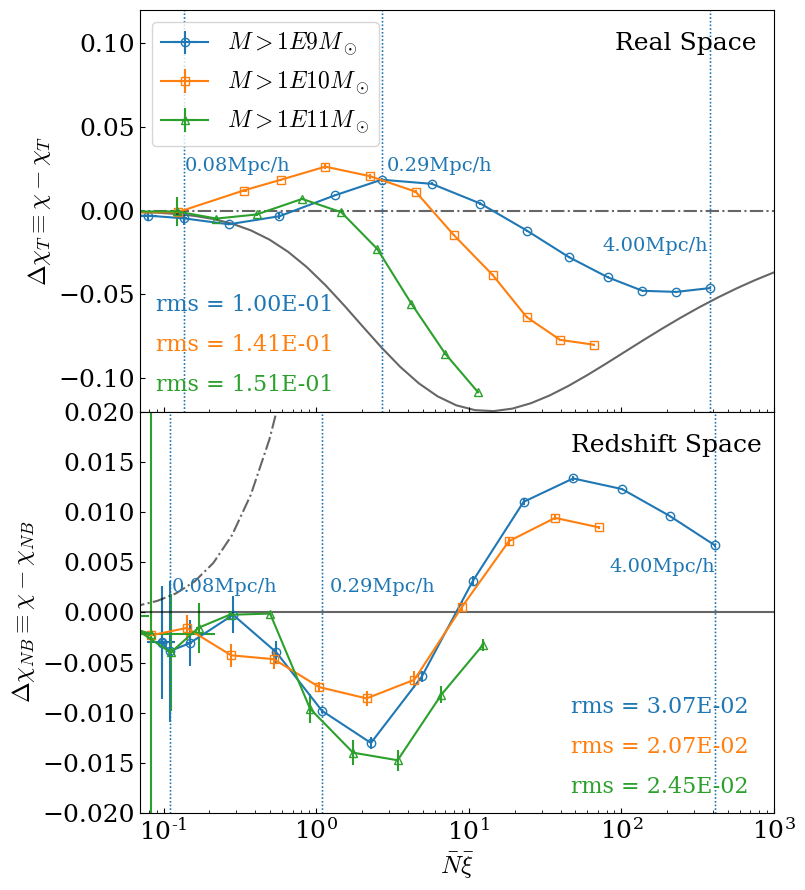

In [47]:
import numpy as np
from cicTools import *
import matplotlib.pyplot as plt

fs = 18

plt.rcParams["xtick.labelsize"] = fs
plt.rcParams["ytick.labelsize"] = fs
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["ytick.direction"] = 'in'
plt.rcParams["xtick.direction"] = 'in'

def chi_NB(x):
    return np.log(1+x)/x
def chi_T(x):
    return (np.sqrt(1+2*x)-1)/x

fig, axs = plt.subplots(2, 1, figsize=(8, 9), sharex=False)
ax=axs[0]
ax1=axs[1]

xmin, xmax = 1E-3, 1E3 
x = np.geomspace(xmin,xmax,50)
#ax.plot(x,np.log(1+x)/x,label='NB',c='k',alpha=0.6)
#ax.plot(x,(np.sqrt(1+2*x)-1)/x,label='Therm.',c='k',ls='-.',alpha=0.6)
ax1.plot(x,chi_NB(x)-chi_NB(x),c='k',alpha=0.6)
ax1.plot(x,chi_T(x)-chi_NB(x),c='k',ls='-.',alpha=0.6)
ax.plot(x,chi_NB(x)-chi_T(x),c='k',alpha=0.6)
ax.plot(x,chi_T(x)-chi_T(x),c='k',ls='-.',alpha=0.6)

# a=.2
# ax.plot(x,(1/((1-a)*(x/a)))*((1+x/a)**(1-a)-1),label='GH',c='k',ls='--',alpha=0.6)
# Q=1.2
# ax.plot(x,1-(np.euler_gamma+np.log(4*Q*x))/(8*Q),label='BBGKY',c='k',ls=':',alpha=0.6)


#---------------------------------------------------------------------------------------------

"""
REAL SPACE
"""
files = ['../data/allgxs_nesf100000_jk.npz',\
         '../data/allgxs_nesf100000_jk_minMass1e10.npz',\
         '../data/allgxs_nesf100000_jk_minMass1e11.npz']#,\
         #'../data/allgxs_nesf100000_invoid_jk_minMass1e12_v1e11_minradV9.0.npz']
markers = ['o','s','^']#,'o']
labels = [r'$M > 1E9M_\odot$', r'$M > 1E10M_\odot$',r'$M > 1E11M_\odot$']#,'Mass > 1e12']
ypos_rmss = [.25,.15,.05]

for file,marker,label,ypos_rms in zip(files,markers,labels,ypos_rmss):

    stats = np.load(file)

    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    P0err=delta_P0(P0,10E5)
    NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
    chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)

    # Plot vlines with scales
    if marker=='o':
        space = 1.3
        lw = 1
        ls = ':'
        for ind,xpos_vline,ypos_vline in zip([2,6,-1],[.07,.39,.73],[.6,.6,.4]):
            vline=ax.axvline(NXi[ind],lw=lw,ls=ls)#,color=color)
            ax.axvline(NXi[ind],lw=lw,ls=ls)#,color=color)
            ax.text(xpos_vline,ypos_vline,f'{rs[ind]/1000.:.2f}Mpc/h',\
                    size=fs-4,transform=ax.transAxes,color=vline.get_color())

    # chi vs Nxi
    ebar = ax.errorbar(NXi,chi-chi_T(NXi),xerr=NXierr,yerr=chierr,marker=marker,mfc='none',label=label)

    # RMS
    mask = np.where(NXi>1E-1)
    #chirms = chi[mask]
    #mask = np.isfinite(chirms) #filter inf and NaN
    rms = np.sqrt(np.sum((chi[mask]-chi_T(NXi[mask]))**2))
    ax.text(.025,ypos_rms,f'rms = {rms:.2E}',size=fs-2,color=ebar[0].get_color(),transform=ax.transAxes)


"""
REDSHIFT SPACE
"""
files = ['../data/allgxs_nesf100000_redshiftz_jk.npz',\
         '../data/allgxs_nesf100000_redshiftz_jk_minMass1e10.npz',\
         '../data/allgxs_nesf100000_redshiftz_jk_minMass1e11.npz']#,\
         #'../data/allgxs_nesf100000_redshiftz_invoid_jk_minMass1e12_v1e11_minradV9.0.npz']
markers = ['o','s','^']#,'o']
labels = ['Mass > 1E09', 'Mass > 1E10','Mass > 1E11']#,'Mass > 1e12']
ypos_rmss = [.25,.15,.05] 

for file,marker,label,ypos_rms in zip(files,markers,labels,ypos_rmss):
    print(file)
    stats = np.load(file)

    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    # Errors
    P0err=delta_P0(P0,10E5)
    NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
    chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)

    # Plot vlines with scales
    if marker=='o':
        space = 1.3
        lw = 1
        ls = ':'
        for ind,xpos_vline,ypos_vline in zip([2,6,-1],[.05,.3,.74],[.55,.55,.6]):
            vline=ax1.axvline(NXi[ind],lw=lw,ls=ls)#,color=color)
            ax1.axvline(NXi[ind],lw=lw,ls=ls)#,color=color)
            ax1.text(xpos_vline,ypos_vline,f'{rs[ind]/1000.:.2f}Mpc/h',\
                    size=fs-4,transform=ax1.transAxes,color=vline.get_color())

    # chi vs Nxi
    ebar = ax1.errorbar(NXi,chi-chi_NB(NXi),xerr=NXierr,yerr=chierr,marker=marker,mfc='none',label=label)

    # RMS
    #print(chi)
    mask = np.where(NXi>1E-1)
    #print(chi[mask])
    #chirms = chi[mask]
    #mask = np.isfinite(chirms) #filter inf and NaN
    rms = np.sqrt(np.sum((chi[mask]-chi_NB(NXi[mask]))**2))
    ax1.text(.68,ypos_rms,f'rms = {rms:.2E}',size=fs-2,color=ebar[0].get_color(),transform=ax1.transAxes)
    

ax1.set_xscale('log')
ax.set_xscale('log')

ax.set_ylabel(r'$\Delta\chi_{T}\equiv\chi-\chi_{T}$',fontsize=fs)
ax1.set_ylabel(r'$\Delta\chi_{NB}\equiv\chi-\chi_{NB}$',fontsize=fs)

#ax.set_xlabel(r'$\bar{N}\bar{\xi}$',fontsize=fs)
ax1.set_xlabel(r'$\bar{N}\bar{\xi}$',fontsize=fs)
ylim1,ylim2 = -.12,.12
ax.set_ylim([ylim1,ylim2])
ax1.set_ylim([-.02,.02])

ax.legend(loc=2,fontsize=fs-1,ncol=1,frameon=True)#,framealpha=.6)

ax.set_xticklabels([])
#ax1.set_yticklabels([])

ax.tick_params(labelsize=fs)
ax1.tick_params(labelsize=fs)

ax.text(.75,.9,'Real Space',fontsize=fs,transform=ax.transAxes)
ax1.text(.68,.9,'Redshift Space',fontsize=fs,transform=ax1.transAxes)

xlim1,xlim2=7E-2,1E3
ax.set_xlim(xlim1,xlim2)
ax1.set_xlim(xlim1,xlim2)

#ax.tick_params(labelsize=fs)
#ax.text(4,1,'Real Space Inside Voids',fontsize=15)

#plt.suptitle('RVPF inside voids',fontsize=fs)
plt.tight_layout()
#plt.subplots_adjust(hspace=0,wspace=0.03)
plt.subplots_adjust(hspace=0)

#plt.savefig('../plots/rVPF_invoid_gxsMass.pdf')
plt.show()